In [1]:
try:
    import os    
    if "add_engmod.py" in os.listdir(): 
        print("Exists!"); import add_engmod
        print("Development version is loaded. For office use only.")
except:
    pass
try:
    import importlib; 
    import engmod.structfem as sfem; importlib.reload(sfem)
    import numpy as np 
    try:
        from datetime import datetime
        
        import os

    except: 
        pass    
    
except Exception as e:
    print(e)
    print("Engmod is not imported. Please ensure that the jupyter notebook and engmod folder is in the same directory.")
import matplotlib.pyplot as plt 

import numpy as np
# import scipy.optimize as sciopt
import scipy.linalg as slin
import matplotlib.pyplot as plt 

print("Successfully imported all modules")

Successfully imported all modules


In [2]:
# The total length of the beam. 
L_beam = 1 
# The Young's modulus in Pa
E = 200E9
# The height of the beam in metres
h = 30/1E3
# The width of the beam in metres
b = 10/1E3
# The area moment of inertia:
I = 1/12 * b * h**3
# The cross-sectional area
A = h * b
# The density (only important for dynamic analyses)
rho = 7800
# The force applied to the structure. 
F = 1000

In [3]:

# In this beam we have three nodes
nodecoor = np.array([
                     [0,0],        # Node 0
                     [L_beam/2,0], # Node 1
                     [L_beam,0]])  # Node 2

elemconn = np.array([
                     [0,1], # Element 0 connects Node 0 and Node 1
                     [1,2]  # Element 1 connects Node 1 and Node 2
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 2, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,0,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([2,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

"""
This is an equivalent method to define the prescribed displacements

prescribed_displacement = np.array([
                                    [0,0,0], # Node 0, in the 0 direction (x-direcion) with a displacement of 0
                                    [0,1,0], # Node 0, in the 1 direction (y-direcion) with a displacement of 0
                                    [2,0,0], # Node 2, in the 0 direction (x-direcion) with a displacement of 0
                                    [2,1,0]  # Node 2, in the 1 direction (y-direcion) with a displacement of 0
                                   ])
"""

# Initialise the prescribed force as an empty list:
prescribed_forces = np.array([[1,1,100]])

"""
This is an equivalent method to define the prescribed forces

prescribed_forces = np.array([
                              [1,1,F], # Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
                             ])
"""

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

print(prescribed_forces)
fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties


[[  1   1 100]]


In [4]:
fmn.solve()

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  1.38888889e-03,  0.00000000e+00,
         4.62962963e-04, -1.23358114e-19,  0.00000000e+00,  0.00000000e+00,
        -1.38888889e-03]),
 'loads': array([  0., -50.,   0.,   0., 100.,   0.,   0., -50.,   0.])}

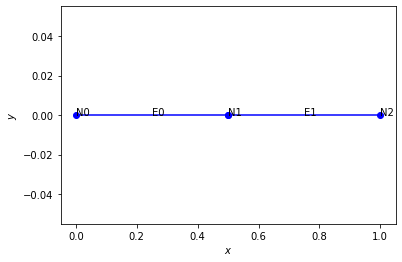

In [5]:
fmn.plot_system()

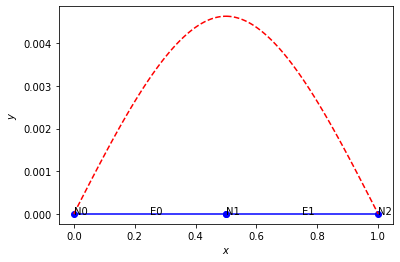

In [6]:
fmn.plot_system(show_displacement=True,magnification=10)

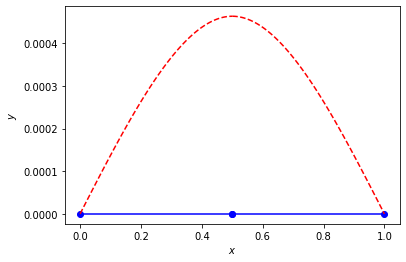

In [7]:
fmn.plot_system(show_element_numbers=False,show_node_numbers=False,show_displacement=True)

In [8]:
fmn.eigen()

{'natural_frequencies_hz': array([  69.15585371,  305.82224648,  768.70936229, 1401.45359367,
        2791.76238302]),
 'modes': array([[ 2.92683529e+00, -7.16114874e+00, -1.54138730e+01,
          1.89466187e+01,  1.54677412e-15],
        [-8.70525388e-18,  4.44679491e-17,  8.64456326e-18,
          1.52300572e-16, -1.13227703e+00],
        [ 9.31859902e-01, -5.85938879e-15,  8.42345768e-01,
          2.56148144e-16, -1.39054876e-17],
        [ 4.34593494e-14,  7.16114874e+00, -9.05403113e-15,
          1.89466187e+01,  1.94185127e-15],
        [-2.92683529e+00, -7.16114874e+00,  1.54138730e+01,
          1.89466187e+01,  4.63070148e-15]]),
 'coor_global': array([0. , 0.5, 1. , 0. , 0. , 0. ]),
 'index_p': array([0, 1, 6, 7]),
 'index_f': array([2, 3, 4, 5, 8])}

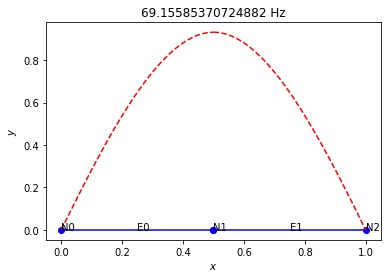

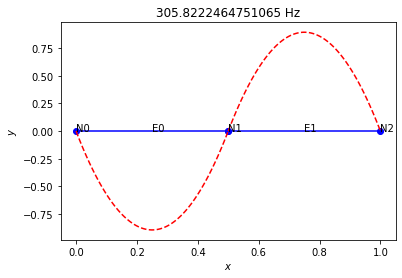

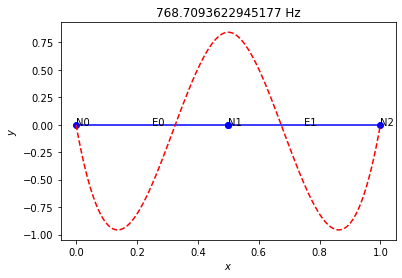

In [9]:
fmn.plot_modes()

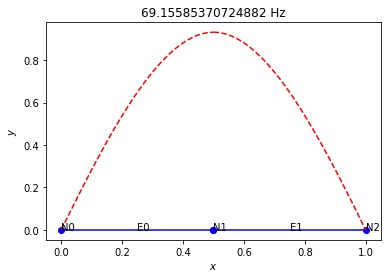

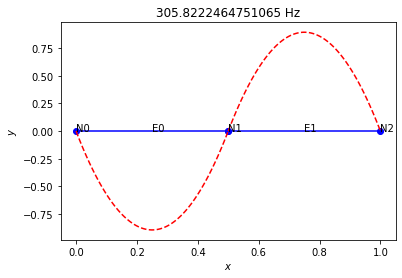

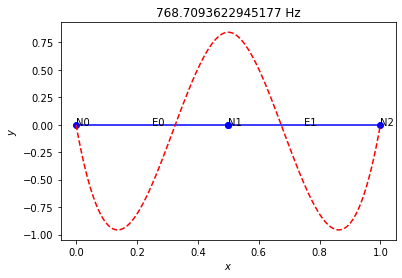

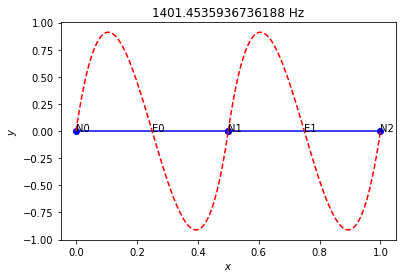

In [10]:
fmn.plot_modes(number_of_modes=4)

In [11]:
fmn.stiffness_global()

array([[ 1.20e+08,  0.00e+00,  0.00e+00, -1.20e+08,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  4.32e+05,  1.08e+05,  0.00e+00, -4.32e+05,  1.08e+05,
         0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.08e+05,  3.60e+04,  0.00e+00, -1.08e+05,  1.80e+04,
         0.00e+00,  0.00e+00,  0.00e+00],
       [-1.20e+08,  0.00e+00,  0.00e+00,  2.40e+08,  0.00e+00,  0.00e+00,
        -1.20e+08,  0.00e+00,  0.00e+00],
       [ 0.00e+00, -4.32e+05, -1.08e+05,  0.00e+00,  8.64e+05,  0.00e+00,
         0.00e+00, -4.32e+05,  1.08e+05],
       [ 0.00e+00,  1.08e+05,  1.80e+04,  0.00e+00,  0.00e+00,  7.20e+04,
         0.00e+00, -1.08e+05,  1.80e+04],
       [ 0.00e+00,  0.00e+00,  0.00e+00, -1.20e+08,  0.00e+00,  0.00e+00,
         1.20e+08,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -4.32e+05, -1.08e+05,
         0.00e+00,  4.32e+05, -1.08e+05],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.08e+05,  1.80e+04

In [12]:
fmn.mass_global()

array([[ 0.39      ,  0.        ,  0.        ,  0.195     ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.43457143,  0.03064286,  0.        ,  0.15042857,
        -0.01810714,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.03064286,  0.00278571,  0.        ,  0.01810714,
        -0.00208929,  0.        ,  0.        ,  0.        ],
       [ 0.195     ,  0.        ,  0.        ,  0.78      ,  0.        ,
         0.        ,  0.195     ,  0.        ,  0.        ],
       [ 0.        ,  0.15042857,  0.01810714,  0.        ,  0.86914286,
         0.        ,  0.        ,  0.15042857, -0.01810714],
       [ 0.        , -0.01810714, -0.00208929,  0.        ,  0.        ,
         0.00557143,  0.        ,  0.01810714, -0.00208929],
       [ 0.        ,  0.        ,  0.        ,  0.195     ,  0.        ,
         0.        ,  0.39      ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [13]:
fmn.elemconn

array([[0, 1],
       [1, 2]])

In [14]:
Mff,Kff = fmn.dynamic_make_matrices()

In [15]:
fmn.mass_global_partition()

(array([[ 0.00278571,  0.        ,  0.01810714, -0.00208929,  0.        ],
        [ 0.        ,  0.78      ,  0.        ,  0.        ,  0.        ],
        [ 0.01810714,  0.        ,  0.86914286,  0.        , -0.01810714],
        [-0.00208929,  0.        ,  0.        ,  0.00557143, -0.00208929],
        [ 0.        ,  0.        , -0.01810714, -0.00208929,  0.00278571]]),
 array([[ 0.        ,  0.03064286,  0.        ,  0.        ],
        [ 0.195     ,  0.        ,  0.195     ,  0.        ],
        [ 0.        ,  0.15042857,  0.        ,  0.15042857],
        [ 0.        , -0.01810714,  0.        ,  0.01810714],
        [ 0.        ,  0.        ,  0.        , -0.03064286]]),
 array([[0.39      , 0.        , 0.        , 0.        ],
        [0.        , 0.43457143, 0.        , 0.        ],
        [0.        , 0.        , 0.39      , 0.        ],
        [0.        , 0.        , 0.        , 0.43457143]]))

In [16]:
fmn.post_axial_stress_strain()

{'stress': array([0., 0.]), 'strain': array([0., 0.])}

In [17]:
fmn.post_get_bending_moment(1)

{'moment': array([-2.50000000e+01, -2.47474747e+01, -2.44949495e+01, -2.42424242e+01,
        -2.39898990e+01, -2.37373737e+01, -2.34848485e+01, -2.32323232e+01,
        -2.29797980e+01, -2.27272727e+01, -2.24747475e+01, -2.22222222e+01,
        -2.19696970e+01, -2.17171717e+01, -2.14646465e+01, -2.12121212e+01,
        -2.09595960e+01, -2.07070707e+01, -2.04545455e+01, -2.02020202e+01,
        -1.99494949e+01, -1.96969697e+01, -1.94444444e+01, -1.91919192e+01,
        -1.89393939e+01, -1.86868687e+01, -1.84343434e+01, -1.81818182e+01,
        -1.79292929e+01, -1.76767677e+01, -1.74242424e+01, -1.71717172e+01,
        -1.69191919e+01, -1.66666667e+01, -1.64141414e+01, -1.61616162e+01,
        -1.59090909e+01, -1.56565657e+01, -1.54040404e+01, -1.51515152e+01,
        -1.48989899e+01, -1.46464646e+01, -1.43939394e+01, -1.41414141e+01,
        -1.38888889e+01, -1.36363636e+01, -1.33838384e+01, -1.31313131e+01,
        -1.28787879e+01, -1.26262626e+01, -1.23737374e+01, -1.21212121e+01,
  

In [18]:
fmn.post_get_displacement(2,1)

0.0

In [19]:
fmn.post_get_displacement_element(1)

{'x_displ': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'y_displ': array([4.62962963e-04, 4.61073043e-04, 4.55538276e-04, 4.46561155e-04,
        4.34344171e-04, 4.19089814e-04, 4.01000578e-04, 3.80278952e-04,
        3.57127429e-04, 3.31748500e-04, 3.04344657e-04, 2.75118390e-04,
        2.44272192e-04, 2.12008553e-04, 1.78529966e-04, 1.44038922e-04,
        1.08737911e-04, 7.28294267e-05, 3.65159591e-05, 6.94445044e-14]),
 'x_coor': array([0.5       , 0.52631579, 0.55263158, 0.57894737, 0.60526316,
        0.63157895, 0.65789474, 0.68421053, 0.71052632, 0.73684211,
        0.76315789, 0.78947368, 0.81578947, 0.84210526, 0.86842105,
        0.89473684, 0.92105263, 0.94736842, 0.97368421, 1.        ]),
 'y_coor': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])}

In [20]:
fmn.post_get_force(2,1)

-50.0

In [21]:
fmn.post_get_stress(1)

0.0

Minimum bending moment: -24.999999999999993
Maximum bending moment: 2.220446049250313e-15


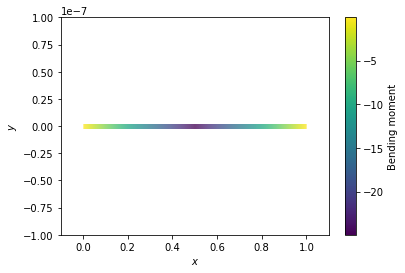

In [22]:
fmn.post_plot_bending_moment()

In [23]:
fmn.post_print_element_data([2,2])

                     Element 0                     
Data: 0.000002
                     Element 1                     
Data: 0.000002


In [24]:
fmn.post_print_solution()


                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.001389, F_x: 0.000000, F_y: -50.000000, M_z: 0.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.462963 x 10^-3, angle: -0.000000, F_x: 0.000000, F_y: 100.000000, M_z: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.001389, F_x: 0.000000, F_y: -50.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************


In [25]:
fmn.solution_dict

{'displacements': array([ 0.00000000e+00,  0.00000000e+00,  1.38888889e-03,  0.00000000e+00,
         4.62962963e-04, -1.23358114e-19,  0.00000000e+00,  0.00000000e+00,
        -1.38888889e-03]),
 'loads': array([  0., -50.,   0.,   0., 100.,   0.,   0., -50.,   0.])}

In [26]:
fmn.stiffness_global()

array([[ 1.20e+08,  0.00e+00,  0.00e+00, -1.20e+08,  0.00e+00,  0.00e+00,
         0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  4.32e+05,  1.08e+05,  0.00e+00, -4.32e+05,  1.08e+05,
         0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  1.08e+05,  3.60e+04,  0.00e+00, -1.08e+05,  1.80e+04,
         0.00e+00,  0.00e+00,  0.00e+00],
       [-1.20e+08,  0.00e+00,  0.00e+00,  2.40e+08,  0.00e+00,  0.00e+00,
        -1.20e+08,  0.00e+00,  0.00e+00],
       [ 0.00e+00, -4.32e+05, -1.08e+05,  0.00e+00,  8.64e+05,  0.00e+00,
         0.00e+00, -4.32e+05,  1.08e+05],
       [ 0.00e+00,  1.08e+05,  1.80e+04,  0.00e+00,  0.00e+00,  7.20e+04,
         0.00e+00, -1.08e+05,  1.80e+04],
       [ 0.00e+00,  0.00e+00,  0.00e+00, -1.20e+08,  0.00e+00,  0.00e+00,
         1.20e+08,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00, -4.32e+05, -1.08e+05,
         0.00e+00,  4.32e+05, -1.08e+05],
       [ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  1.08e+05,  1.80e+04

In [27]:
fmn.stiffness_global_partition()

(array([[ 3.60e+04,  0.00e+00, -1.08e+05,  1.80e+04,  0.00e+00],
        [ 0.00e+00,  2.40e+08,  0.00e+00,  0.00e+00,  0.00e+00],
        [-1.08e+05,  0.00e+00,  8.64e+05,  0.00e+00,  1.08e+05],
        [ 1.80e+04,  0.00e+00,  0.00e+00,  7.20e+04,  1.80e+04],
        [ 0.00e+00,  0.00e+00,  1.08e+05,  1.80e+04,  3.60e+04]]),
 array([[ 0.00e+00,  1.08e+05,  0.00e+00,  0.00e+00],
        [-1.20e+08,  0.00e+00, -1.20e+08,  0.00e+00],
        [ 0.00e+00, -4.32e+05,  0.00e+00, -4.32e+05],
        [ 0.00e+00,  1.08e+05,  0.00e+00, -1.08e+05],
        [ 0.00e+00,  0.00e+00,  0.00e+00, -1.08e+05]]),
 array([[1.20e+08, 0.00e+00, 0.00e+00, 0.00e+00],
        [0.00e+00, 4.32e+05, 0.00e+00, 0.00e+00],
        [0.00e+00, 0.00e+00, 1.20e+08, 0.00e+00],
        [0.00e+00, 0.00e+00, 0.00e+00, 4.32e+05]]))

In [28]:
u = fmn.solution_dict["displacements"]
F = fmn.solution_dict["loads"]
fmn.stiffness_global() @ u - F

array([ 0.00000000e+00,  0.00000000e+00, -2.22044605e-15,  0.00000000e+00,
        0.00000000e+00, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [29]:
fmn.post_print_solution(displacement=fmn.solution_dict["displacements"]*2)

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.002778, F_x: 0.000000, F_y: -100.000000, M_z: -0.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.925926 x 10^-3, angle: -0.000000, F_x: 0.000000, F_y: 200.000000, M_z: -0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.002778, F_x: 0.000000, F_y: -100.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************


In [30]:
fmn.post_print_solution()

                     Node 0                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: 0.001389, F_x: 0.000000, F_y: -50.000000, M_z: 0.000000
                     Node 1                     
u_x: 0.000000 x 10^-3, u_y: 0.462963 x 10^-3, angle: -0.000000, F_x: 0.000000, F_y: 100.000000, M_z: 0.000000
                     Node 2                     
u_x: 0.000000 x 10^-3, u_y: 0.000000 x 10^-3, angle: -0.001389, F_x: 0.000000, F_y: -50.000000, M_z: 0.000000

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************

                     Element 0                     
Normal stress due to axial load (only): 0.000000 x 10^6
                     Element 1                     
Normal stress due to axial load (only): 0.000000 x 10^6

******************** WARNING ********************
*** Bending stresses not calculated ***
******************** WARNING ********************
